# Titanic 1

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df_train=pd.read_csv('C:/Users/ehfus/Downloads/titanic/train.csv')
df_test=pd.read_csv('C:/Users/ehfus/Downloads/titanic/test.csv')

In [75]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> 각 칼럼의 통계적인 수치들

In [77]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df_train.max() # df_train.describe() 에 들어있긴 함

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [79]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> ### 자료 형태

In [80]:
df_train.shape

(891, 12)

In [81]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

> ### 각 칼럼에 null data가 몇개 있는지 퍼센트를 보기 위한 

- {0:<10} => {0} 값을 ":<10" 10자리로 표현할건데 왼쪽 정렬
- {1:>5} =>  {1} 값을 ":>5" 5자리로 표현할건데 오른쪽 정렬
- :^10 = 가운데 정렬
- \t 이건 탭 한 번 눌러주는 기능 => 그래서 중간에 크게 띄어쓰기 가능해짐

In [82]:
for col in df_train.columns:
    msg='column:  {:^11}\t Percent of NaN value {:.2f}%'\
    .format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0] ))
    print(msg)

column:  PassengerId	 Percent of NaN value 0.00%
column:   Survived  	 Percent of NaN value 0.00%
column:    Pclass   	 Percent of NaN value 0.00%
column:     Name    	 Percent of NaN value 0.00%
column:      Sex    	 Percent of NaN value 0.00%
column:      Age    	 Percent of NaN value 19.87%
column:     SibSp   	 Percent of NaN value 0.00%
column:     Parch   	 Percent of NaN value 0.00%
column:    Ticket   	 Percent of NaN value 0.00%
column:     Fare    	 Percent of NaN value 0.00%
column:     Cabin   	 Percent of NaN value 77.10%
column:   Embarked  	 Percent of NaN value 0.22%


In [83]:
for col in df_test.columns:
    msg='column:{:>10}\t Percent of NaN value {:.2f}%'\
    .format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0] ))
    print(msg)

column:PassengerId	 Percent of NaN value 0.00%
column:    Pclass	 Percent of NaN value 0.00%
column:      Name	 Percent of NaN value 0.00%
column:       Sex	 Percent of NaN value 0.00%
column:       Age	 Percent of NaN value 20.57%
column:     SibSp	 Percent of NaN value 0.00%
column:     Parch	 Percent of NaN value 0.00%
column:    Ticket	 Percent of NaN value 0.00%
column:      Fare	 Percent of NaN value 0.24%
column:     Cabin	 Percent of NaN value 78.23%
column:  Embarked	 Percent of NaN value 0.00%


> 위 셀에서 for문 실행하면서 가장 마지막에 col에  Embarked가 저장되면서 col이  Embarked로 끝나게 됨

In [84]:
col

'Embarked'

In [85]:
df_train[col]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [86]:
df_train[col].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [87]:
df_train[col].isnull().sum()

2

msno라는 라이브러리를 이용해서 매트릭스를 만듦

color는 각각 RGB

<AxesSubplot:>

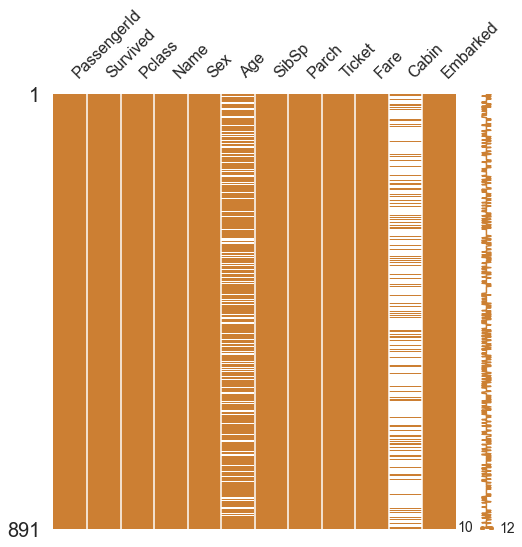

In [88]:
msno.matrix( df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

빈칸은 null

<AxesSubplot:>

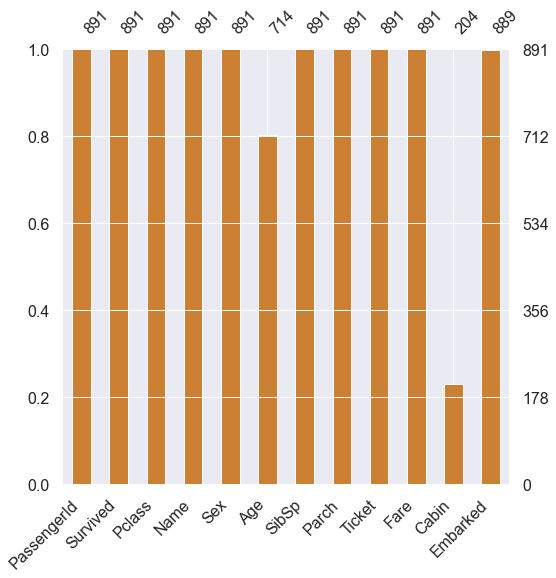

In [89]:
msno.bar( df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

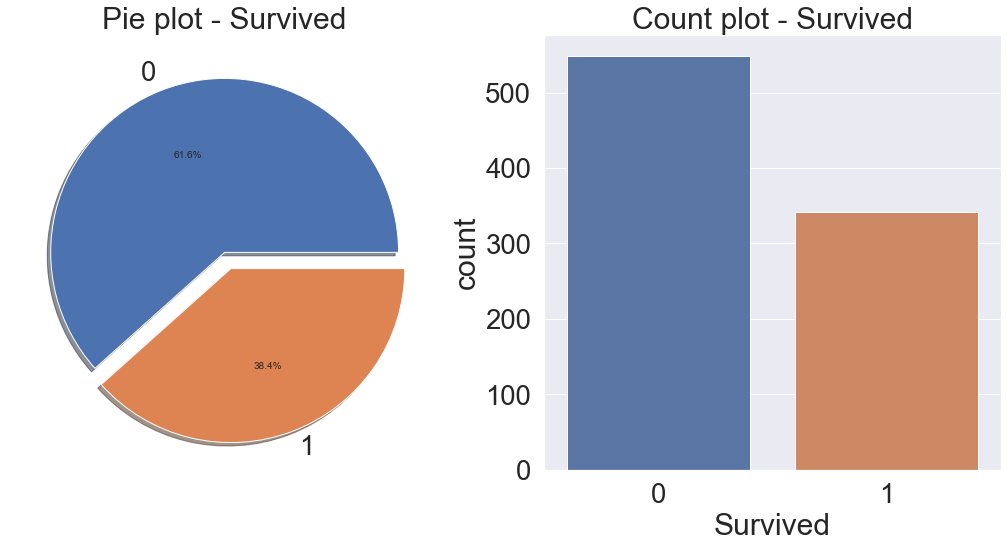

In [90]:
f,ax=plt.subplots(1, 2, figsize=(18,8))
df_train['Survived'].value_counts()\
.plot.pie(explode=[0,0.1],autopct='%0.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') # 원래 pieplot y축에 라벨 있었는데 없애줌
sns.countplot('Survived', data=df_train, ax=ax[1]) # df_train의 Survived column을 소환
ax[1].set_title('Count plot - Survived')
plt.show()

In [92]:
df_train.shape

(891, 12)